https://www.mouser.com/datasheet/2/400/elp_102_20_38-1527691.pdf

In [1]:
from handcalcs import *
from math import pi, sqrt

In [10]:
from math import pi, sqrt


# ELP 102/20/38 with ELP 102/20/38

Bsat = 300e-3 # T (hyp)



le = 121.2 #mm
Ae = 534.2 #mm2
Amin = 524.5 #mm2
Ve = 67745 #mm3


AL = 9600 # nH
mu_r =1740 
R= 1 # serial 
arr=[]
for C in [100e-9,1e-6,4e-6,10e-6,50e-6]:
    for N in (4,10,100):
        L = AL*N**2*1e-9
        #C=4e-6
         
        f=1/(2*pi*sqrt(L*C))
         
        mu_0 = 4*pi*1e-7   # H/m (permeability of free space)
        I_sat = Bsat * le*1e-3 / (mu_0 * mu_r * N)
        
        V_0 = I_sat/sqrt(C/L) 
        Zc_r= Zl_r = sqrt(L/C) # Z at the resonace for R charge 
        zeta = R/2 *sqrt(C/L) 
        
        print(f"#  N= {N} C = {C*1e6:.1f}uF V_0={V_0 :.3f} I_sat={I_sat :.3f} fres= {(f/1000):.2f}kHz T={(1000/f):.2f}ms Zr={Zc_r:.1f}Ohm L={L*1e6:.0f} uF Zeta={zeta}")
        dic = {
            "N": N,
            "C_uF": C * 1e6,           # Convert Farad → µF
            "V_0": V_0,
            "I_sat": I_sat,
            "f_kHz": f / 1000,         # Frequency in kHz
            "T_ms": 1000 / f,          # Period in ms
            "Zr_Ohm": Zc_r,
            "L_uH": L * 1e6,           # Convert H → µH
            "Zeta": zeta
        }
        arr.append(dic)

#  N= 4 C = 0.1uF V_0=162.930 I_sat=4.157 fres= 40.61kHz T=0.02ms Zr=39.2Ohm
#  N= 10 C = 0.1uF V_0=162.930 I_sat=1.663 fres= 16.24kHz T=0.06ms Zr=98.0Ohm
#  N= 100 C = 0.1uF V_0=162.930 I_sat=0.166 fres= 1.62kHz T=0.62ms Zr=979.8Ohm
#  N= 4 C = 1.0uF V_0=51.523 I_sat=4.157 fres= 12.84kHz T=0.08ms Zr=12.4Ohm
#  N= 10 C = 1.0uF V_0=51.523 I_sat=1.663 fres= 5.14kHz T=0.19ms Zr=31.0Ohm
#  N= 100 C = 1.0uF V_0=51.523 I_sat=0.166 fres= 0.51kHz T=1.95ms Zr=309.8Ohm
#  N= 4 C = 4.0uF V_0=25.761 I_sat=4.157 fres= 6.42kHz T=0.16ms Zr=6.2Ohm
#  N= 10 C = 4.0uF V_0=25.761 I_sat=1.663 fres= 2.57kHz T=0.39ms Zr=15.5Ohm
#  N= 100 C = 4.0uF V_0=25.761 I_sat=0.166 fres= 0.26kHz T=3.89ms Zr=154.9Ohm

#  N= 4 C = 0.1uF V_0=162.930 I_sat=4.157 fres= 40.61kHz T=0.02ms Zr=39.2Ohm L=154 uF Zeta=0.012757759076995718
#  N= 10 C = 0.1uF V_0=162.930 I_sat=1.663 fres= 16.24kHz T=0.06ms Zr=98.0Ohm L=960 uF Zeta=0.005103103630798287
#  N= 100 C = 0.1uF V_0=162.930 I_sat=0.166 fres= 1.62kHz T=0.62ms Zr=979.8Ohm L=96000 uF Zeta=0.0005103103630798287
#  N= 4 C = 1.0uF V_0=51.523 I_sat=4.157 fres= 12.84kHz T=0.08ms Zr=12.4Ohm L=154 uF Zeta=0.04034357652299392
#  N= 10 C = 1.0uF V_0=51.523 I_sat=1.663 fres= 5.14kHz T=0.19ms Zr=31.0Ohm L=960 uF Zeta=0.01613743060919757
#  N= 100 C = 1.0uF V_0=51.523 I_sat=0.166 fres= 0.51kHz T=1.95ms Zr=309.8Ohm L=96000 uF Zeta=0.001613743060919757
#  N= 4 C = 4.0uF V_0=25.761 I_sat=4.157 fres= 6.42kHz T=0.16ms Zr=6.2Ohm L=154 uF Zeta=0.08068715304598784
#  N= 10 C = 4.0uF V_0=25.761 I_sat=1.663 fres= 2.57kHz T=0.39ms Zr=15.5Ohm L=960 uF Zeta=0.03227486121839514
#  N= 100 C = 4.0uF V_0=25.761 I_sat=0.166 fres= 0.26kHz T=3.89ms Zr=154.9Ohm L=96000 uF Zeta=0.003227486

In [33]:
import pandas as pd
df= pd.DataFrame(arr)
df

,N,C_uF,V_0,I_sat,f_kHz,T_ms,Zr_Ohm,L_uH,Zeta
0,4,0.1,162.929745,4.157237,40.609208,0.024625,39.191836,153.6,0.012758
1,10,0.1,162.929745,1.662895,16.243683,0.061562,97.979590,960.0,0.005103
2,100,0.1,162.929745,0.166289,1.624368,0.615624,979.795897,96000.0,0.000510
3,4,1.0,51.522909,4.157237,12.841759,0.077871,12.393547,153.6,0.040344
4,10,1.0,51.522909,1.662895,5.136704,0.194677,30.983867,960.0,0.016137
5,100,1.0,51.522909,0.166289,0.513670,1.946774,309.838668,96000.0,0.001614
6,4,4.0,25.761455,4.157237,6.420880,0.155742,6.196773,153.6,0.080687
7,10,4.0,25.761455,1.662895,2.568352,0.389355,15.491933,960.0,0.032275
8,100,4.0,25.761455,0.166289,0.256835,3.893548,154.919334,96000.0,0.003227
9,4,10.0,16.292975,4.157237,4.060921,0.246250,3.919184,153.6,0.127578


In [ ]:
1.16khz==>1.88mz'"t(zst'éza

In [32]:
import numpy  as np
import matplotlib.pyplot as plt
R= 50
freq = np.arange(2e3,200e3)

for N in (1, 4,10):
    L = AL*N**2*1e-9
    To = L/R
    print(N, To)
    ZL_abs = L*freq*2*pi
    Z= np.sqrt(R**2+ZL_abs**2)
    

1 1.9200000000000003e-07
4 3.0720000000000004e-06
10 1.92e-05


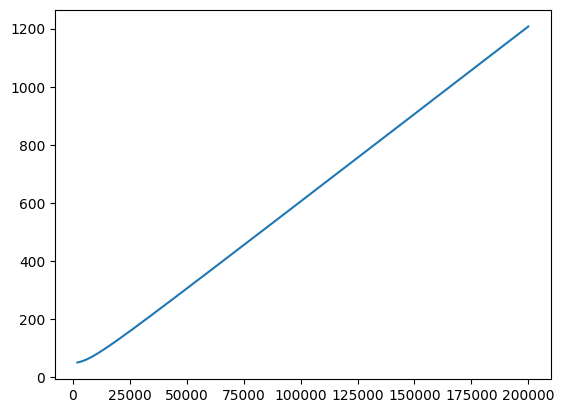

In [31]:

plt.plot(freq,Z)

In [1]:
from math import pi, sqrt


# ELP 102/20/38 with ELP 102/20/38

Bsat = 300e-3 # T (hyp)



le = 121.2 #mm
Ae = 534.2 #mm2
Amin = 524.5 #mm2
Ve = 67745 #mm3


AL = 9600 # nH
mu_r =1740 
R= 1 # serial 
arr=[]
for C in [10e-6]:
    for N in (1,2, 3,4,10):
        L = AL*N**2*1e-9
        #C=4e-6
         
        f=1/(2*pi*sqrt(L*C))
         
        mu_0 = 4*pi*1e-7   # H/m (permeability of free space)
        I_sat = Bsat * le*1e-3 / (mu_0 * mu_r * N)
        
        V_0 = I_sat/sqrt(C/L) 
        Zc_r= Zl_r = sqrt(L/C) # Z at the resonace for R charge 
        zeta = R/2 *sqrt(C/L) 
        Z= 50 # LW= 2*pi*f*L
        f_50ohm= Z/(2*pi*L)
        
        
        #print(f"#  N= {N} C = {C*1e6:.1f}uF V_0={V_0 :.3f} I_sat={I_sat :.3f} fres= {(f/1000):.2f}kHz T={(1000/f):.2f}ms Zr={Zc_r:.1f}Ohm L={L*1e6:.0f} uF Zeta={zeta}")
        dic = {
            "N": N,
            "C_uF": C * 1e6,           # Convert Farad → µF
            "V_0": V_0,
            "I_sat": I_sat,
            "f_kHz": f / 1000,         # Frequency in kHz
            "T_ms": 1000 / f,          # Period in ms
            "Zr_Ohm": Zc_r,
            "L_uH": L * 1e6,           # Convert H → µH
            "Zeta": zeta, 
            "f_50ohm":f_50ohm
        }
        arr.append(dic)

import pandas as pd
df= pd.DataFrame(arr)
df

,N,C_uF,V_0,I_sat,f_kHz,T_ms,Zr_Ohm,L_uH,Zeta,f_50ohm
0,1,10.0,16.292975,16.628948,16.243683,0.061562,0.979796,9.6,0.510310,828931.995270
1,2,10.0,16.292975,8.314474,8.121842,0.123125,1.959592,38.4,0.255155,207232.998818
2,3,10.0,16.292975,5.542983,5.414561,0.184687,2.939388,86.4,0.170103,92103.555030
3,4,10.0,16.292975,4.157237,4.060921,0.246250,3.919184,153.6,0.127578,51808.249704
4,10,10.0,16.292975,1.662895,1.624368,0.615624,9.797959,960.0,0.051031,8289.319953


In [38]:
I= 1
R=0.002
R*I*500


1.0

8289.319952702883

In [ ]:
from math import pi, sqrt


# ELP 102/20/38 with ELP 102/20/38

Bsat = 300e-3 # T (hyp)



le = 121.2 #mm
Ae = 534.2 #mm2
Amin = 524.5 #mm2
Ve = 67745 #mm3


AL = 9600 # nH
mu_r =1740 
R= 1 # serial 
arr=[]
N=10
for f in [1e3,10e4,
        L = AL*N**2*1e-9
        #C=4e-6
         
        f=1/(2*pi*sqrt(L*C))
         
        mu_0 = 4*pi*1e-7   # H/m (permeability of free space)
        I_sat = Bsat * le*1e-3 / (mu_0 * mu_r * N)
        
        V_0 = I_sat/sqrt(C/L) 
        Zc_r= Zl_r = sqrt(L/C) # Z at the resonace for R charge 
        zeta = R/2 *sqrt(C/L) 
        Z= 50 # LW= 2*pi*f*L
        f_50ohm= Z/(2*pi*L)
        
        
        #print(f"#  N= {N} C = {C*1e6:.1f}uF V_0={V_0 :.3f} I_sat={I_sat :.3f} fres= {(f/1000):.2f}kHz T={(1000/f):.2f}ms Zr={Zc_r:.1f}Ohm L={L*1e6:.0f} uF Zeta={zeta}")
        dic = {
            "N": N,
            "C_uF": C * 1e6,           # Convert Farad → µF
            "V_0": V_0,
            "I_sat": I_sat,
            "f_kHz": f / 1000,         # Frequency in kHz
            "T_ms": 1000 / f,          # Period in ms
            "Zr_Ohm": Zc_r,
            "L_uH": L * 1e6,           # Convert H → µH
            "Zeta": zeta, 
            "f_50ohm":f_50ohm
        }
        arr.append(dic)

import pandas as pd
df= pd.DataFrame(arr)
df

In [27]:
from math import *
import numpy as np
N= 10
L = AL*N**2*1e-9
 
R=50
f= 10000
w= 2*pi*f
Z = L *w
Z, atan(L*w/R)*180/pi

(60.31857894892403, 50.343577835069446)

In [155]:
df = pd.DataFrame(
    [
        ["R", "FreqKhz", "Phase"],
        [50, 2.198,17.52  ], 
        [50, 10.21,53.98  ], 
        [50, 50.44,81.44  ], 
        [987, 53.86,20.18 ], 
        [987, 102.7,35.09 ],
        [987, 215.5,55.86 ],
        [987, 505.4,74.06 ],


        
    ]
)


# Take the first row as column names
df.columns = df.iloc[0]  # set columns from first row
df = df[1:].reset_index(drop=True) .astype(float) # remove the first row from data
#L = R * tan(phi) / (2 * pi * f)
df["L_uF"]= 1e6*df.R*np.tan(df.Phase*pi/180)/(2*pi*df.FreqKhz*1e3)
df["Z_L"]= df["L_uF"]*2*pi*df.FreqKhz*1e3*1e-6
df

,R,FreqKhz,Phase,L_uF,Z_L
0,50.0,2.198,17.52,1142.912785,15.784130
1,50.0,10.210,53.98,1071.974838,68.768603
2,50.0,50.440,81.44,1048.131516,332.177893
3,987.0,53.860,20.18,1071.929447,362.754175
4,987.0,102.700,35.09,1074.594800,693.417897
5,987.0,215.500,55.86,1075.018102,1455.602927
6,987.0,505.400,74.06,1088.240667,3455.732019


In [156]:
df['Phase']

0    17.52
1    53.98
2    81.44
3    20.18
4    35.09
5    55.86
6    74.06
Name: Phase, dtype: float64

In [157]:
N=np.array([1,4,10,20,30,40])
L = AL*N**2*1e-9
Bsat = 0.3
Isat = Bsat* Amin*1e-6 /L 
f= 2000
Z= L*2*pi*f
R=50
Vr = Isat*R
VL= Isat*Z
pd.DataFrame({ "N":N,"L":L, "Isat":Isat,"Z":Z, "Vr":Vr, "VL":VL})

,N,L,Isat,Z,Vr,VL
0,1,0.000010,16.390625,0.120637,819.531250,1.977318
1,4,0.000154,1.024414,1.930195,51.220703,1.977318
2,10,0.000960,0.163906,12.063716,8.195312,1.977318
3,20,0.003840,0.040977,48.254863,2.048828,1.977318
4,30,0.008640,0.018212,108.573442,0.910590,1.977318
5,40,0.015360,0.010244,193.019453,0.512207,1.977318


In [158]:
N= 40
f=np.array([5,50,500,1000,2000,10000])
L = AL*N**2*1e-9
Bsat = 0.3
Isat = Bsat* Amin*1e-6 /L 
#f= 2000
Z= L*2*pi*f
R=5
Vr = Isat*R
VL= Isat*Z
pd.DataFrame({ "f":f,"L":L, "Isat":Isat,"Z":Z, "Vr":Vr, "VL":VL})

,f,L,Isat,Z,Vr,VL
0,5,0.01536,0.010244,0.482549,0.051221,0.004943
1,50,0.01536,0.010244,4.825486,0.051221,0.049433
2,500,0.01536,0.010244,48.254863,0.051221,0.494330
3,1000,0.01536,0.010244,96.509726,0.051221,0.988659
4,2000,0.01536,0.010244,193.019453,0.051221,1.977318
5,10000,0.01536,0.010244,965.097263,0.051221,9.886592


In [159]:
N= 62
f=np.array([5,50,500,1000,2000,10000])
L = AL*N**2*1e-9
Bsat = 0.3
Isat = Bsat* Amin*1e-6 /L 
#f= 2000
Z= L*2*pi*f
R=5
Vr = Isat*R
VL= Isat*Z
pd.DataFrame({ "f":f,"L":L, "Isat":Isat,"Z":Z, "Vr":Vr, "VL":VL})

,f,L,Isat,Z,Vr,VL
0,5,0.036902,0.004264,1.159323,0.02132,0.004943
1,50,0.036902,0.004264,11.593231,0.02132,0.049433
2,500,0.036902,0.004264,115.932309,0.02132,0.494330
3,1000,0.036902,0.004264,231.864617,0.02132,0.988659
4,2000,0.036902,0.004264,463.729235,0.02132,1.977318
5,10000,0.036902,0.004264,2318.646175,0.02132,9.886592


In [205]:
########## Design target 

# ELP 102/20/38 with I 102/7/38 N97

Lm_uH  = 65.392
Lm=Lm_uH*1e-6

Bsat = 300e-3 # T (hyp)



le = 121.2 #mm
Ae = 534.2 #mm2
Amin = 524.5 #mm2
Ve = 67745 #mm3

N=4
AL = 9600 # nH
mu_r =1740 
R= 1 # serial 
arr=[]
L = AL*N**2*1e-9
print(L/Lm)

mu_0 = 4*pi *1e-7 # H m−1
lg = 1e3*((mu_0*N**2*Ae*1e-6)/Lm -le*1e-3/mu_r) # mm
print(lg,"mm")


############# Test calculation Func generator + Oscilloscope meas L 

N= 10
lg_ = np.array([0,50e-3,lg,0.1,0.15,0.2,0.25,0.3])
L = (mu_0*N**2*Ae*1e-6)/(lg_*1e-3+le*1e-3/mu_r)
df= pd.DataFrame({"lg":lg_, "L":L})
f= 20000
df["Z"]= df.L*2*pi*f
df.loc[df["lg"]== lg,"remark"]="Target"
R= 50
df["phase"]= np.atan(R/df.Z)*180/pi
df

2.348911181795939
0.09459623894394294 mm


,lg,L,Z,remark,phase
0,0.000000,0.000964,121.107277,NaN,22.433631
1,0.050000,0.000561,70.500490,NaN,35.344835
2,0.094596,0.000409,51.358757,Target,44.231972
3,0.100000,0.000396,49.722906,NaN,45.159204
4,0.150000,0.000306,38.404505,NaN,52.472490
5,0.200000,0.000249,31.283465,NaN,57.967049
6,0.250000,0.000210,26.390151,NaN,62.174772
7,0.300000,0.000182,22.820588,NaN,65.467487


In [206]:
lg

0.09459623894394294

In [207]:
dfTarget= df[df.remark=="Target"].iloc[0 ].to_dict()
dfTarget

{'lg': 0.09459623894394294,
 'L': 0.00040869999999999996,
 'Z': 51.35875670088593,
 'remark': 'Target',
 'phase': 44.231972017327735}

In [211]:
dic = {}
dic ["L_uH"]= dfTarget["L"]*1e6
dic ["Z_L"]= dfTarget["Z"]
dic ["Phase"]= dfTarget["phase"]
dic 

{'L_uH': 408.69999999999993,
 'Z_L': 51.35875670088593,
 'Phase': 44.231972017327735}

In [212]:

dic["kind"]= "Target"
dic

{'L_uH': 408.69999999999993,
 'Z_L': 51.35875670088593,
 'Phase': 44.231972017327735,
 'kind': 'Target'}

In [257]:
N=10
R=50

dic ["AL_nH"]=1e3*dic['L_uH']/N**2
df = pd.DataFrame(
    [
        [ "FreqKhz", "Phase","air gap material","kind","Type"],
        [20.02,68.20], 
        [19.96,68], 
        [19.96,23.34 ,"AG1","plastic"], 
        [19.89,22.02 ,"AG2","plastic"],
        [19.80,33.48,"AG3","paper A3"],
        [19.83,46.8,"AG4","cooking paper"],
        [19.77,44.17,"AG4","cooking paper"],
        [19.76,40.48,"AG5","paper protect film (plastic)"],
        [19.85,40.37,"AG6","packaging ESD film (plastic)"],
        [19.75,49.65,"AG7","Scotch tape (plastic)"],
        

        

        
    ]
)


# Take the first row as column names
df.columns = df.iloc[0]  # set columns from first row
df = df[1:].reset_index(drop=True) .astype({"FreqKhz":"float32", "Phase":"float32"}) # remove the first row from data
#L = R * tan(phi) / (2 * pi * f)
df["L_uH"]= 1e6*R*np.tan(df.Phase*pi/180)/(2*pi*df.FreqKhz*1e3)
df["Z_L"]= df["L_uH"]*2*pi*df.FreqKhz*1e3*1e-6
df["AL_nH"]=1e3*df["L_uH"]/N**2
df.loc[len(df)] = dic
df["L_uH_4_turns"]=df["AL_nH"]*4**2*1e-3
lg = 1e3*((mu_0*N**2*Ae*1e-6)/(df.L_uH*1e-6) -le*1e-3/mu_r) # mm
df["lg"]=lg
df

C:\Users\a037702\AppData\Local\Temp\ipykernel_24188\2267703089.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df.loc[len(df)] = dic


,FreqKhz,Phase,air gap material,kind,Type,L_uH,Z_L,AL_nH,L_uH_4_turns,lg
0,20.020000,68.199997,None,None,None,993.795532,125.008919,9937.956055,159.007297,-0.002107
1,19.959999,68.000000,None,None,None,986.779541,123.754356,9867.795898,157.884734,-0.001626
2,19.959999,23.340000,AG1,plastic,None,172.030838,21.574795,1720.308472,27.524936,0.320563
3,19.889999,22.020000,AG2,plastic,None,161.808456,20.221619,1618.084473,25.889352,0.345215
4,19.799999,33.480000,AG3,paper A3,None,265.814392,33.069187,2658.144043,42.530305,0.182888
5,19.830000,46.799999,AG4,cooking paper,None,427.339386,53.244591,4273.393555,68.374297,0.087432
6,19.770000,44.169998,AG4,cooking paper,None,391.020111,48.571960,3910.201172,62.563219,0.102023
7,19.760000,40.480000,AG5,paper protect film (plastic),None,343.712311,42.673859,3437.123047,54.993969,0.125652
8,19.850000,40.369999,AG6,packaging ESD film (plastic),None,340.825806,42.508217,3408.258057,54.532129,0.127306
9,19.750000,49.650002,AG7,Scotch tape (plastic),None,474.271973,58.853786,4742.719727,75.883516,0.071887
